# ML Basics with Keras - Basic Classification
Source: https://www.tensorflow.org/tutorials/keras/classification

In [2]:
import tensorflow as tf
import tensorflow.keras as keras

import numpy as np
import matplotlib.pyplot as plt

In [14]:
# tf version
print(tf.__version__)

2.2.0


In [116]:
# importing some MNIST data
mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape)
print(train_labels.shape, train_labels)
print(test_images.shape)
print(test_labels.shape, test_labels)

(60000, 28, 28)
(60000,) [9 0 0 ... 3 0 5]
(10000, 28, 28)
(10000,) [9 2 1 ... 8 1 5]


In [117]:
# human readable data labels
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

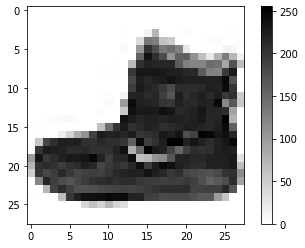

In [118]:
# displaying data
plt.imshow(train_images[0], cmap='binary')
plt.colorbar()

In [119]:
# scaling pixel values to a range of 0 to 1
train_images = train_images / 255
test_images = test_images / 255

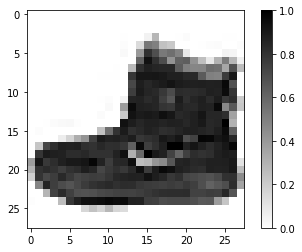

In [120]:
# displaying data
plt.imshow(train_images[0], cmap="binary")
plt.colorbar()

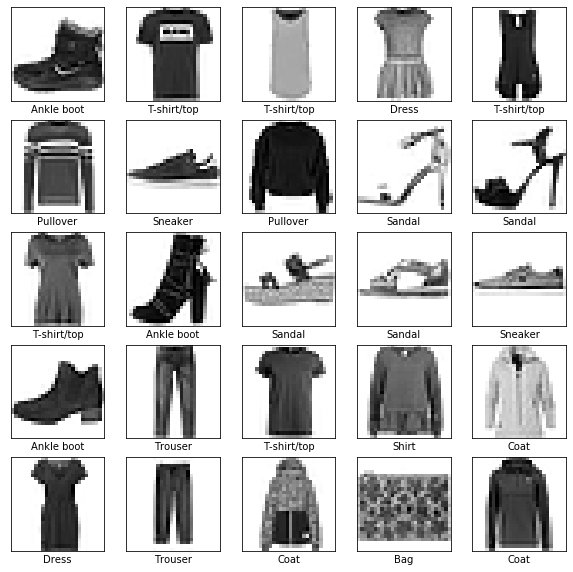

In [121]:
# displaying more data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap="binary")
    plt.xlabel(labels[train_labels[i]])

In [122]:
# building a model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # transforming 28x28 image to 784-elements list
    keras.layers.Dense(128, activation="relu"), # densely connected; 128-neurons layer; ReLU activation function
    keras.layers.Dense(10) # densely connected; 10-neurons layer; no activation function
])

In [123]:
# compiling the model
model.compile(
    optimizer="adam", # how will the model be updated based on its loss function
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), # how will the model be measured while training
    metrics=["accuracy"] # what will the model monitor
)

In [124]:
# fitting to the training data
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 937us/step - loss: 0.4956 - accuracy: 0.8250
Epoch 2/10
1875/1875 [==============================] - 2s 871us/step - loss: 0.3743 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 2s 874us/step - loss: 0.3346 - accuracy: 0.8774
Epoch 4/10
1875/1875 [==============================] - 2s 875us/step - loss: 0.3111 - accuracy: 0.8862
Epoch 5/10
1875/1875 [==============================] - 2s 871us/step - loss: 0.2927 - accuracy: 0.8909
Epoch 6/10
1875/1875 [==============================] - 2s 872us/step - loss: 0.2791 - accuracy: 0.8962
Epoch 7/10
1875/1875 [==============================] - 2s 869us/step - loss: 0.2661 - accuracy: 0.9015
Epoch 8/10
1875/1875 [==============================] - 2s 868us/step - loss: 0.2587 - accuracy: 0.9036
Epoch 9/10
1875/1875 [==============================] - 2s 872us/step - loss: 0.2488 - accuracy: 0.9073
Epoch 10/10
1875/1875 [==============================] - 2s 880u

In [125]:
# evaluating accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc) # we can notice overfitting

313/313 - 0s - loss: 0.3390 - accuracy: 0.8799
0.8798999786376953


In [126]:
# making predictions 
prob_model = keras.Sequential([
    model,
    keras.layers.Softmax() # making results easier to interpret
])

predictions = prob_model.predict(test_images)
print(predictions[0]) # confidences of the first example for each label
print(np.argmax(predictions[0])) # the best one's number - ankle boots

[8.1199358e-09 2.9766809e-09 3.7839559e-10 8.1692726e-13 2.3463892e-11
 1.9849860e-03 2.8200984e-09 3.4281693e-02 2.7852081e-09 9.6373326e-01]
9


In [127]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(labels[predicted_label],
                                100*np.max(predictions_array),
                                labels[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

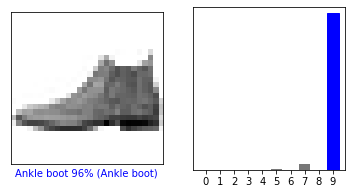

In [128]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)

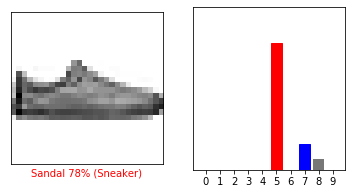

In [129]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)

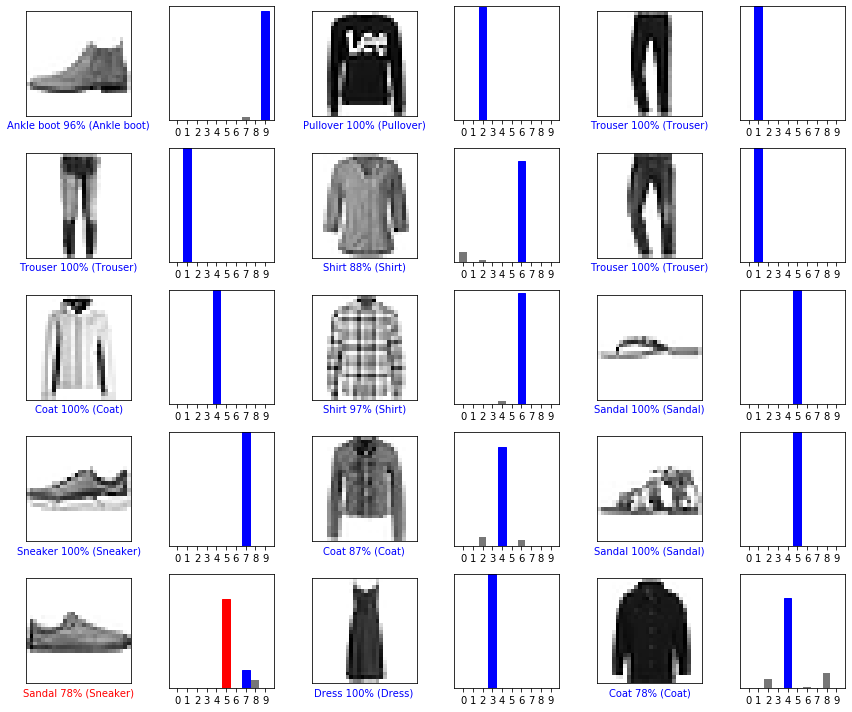

In [130]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

(28, 28)
(1, 28, 28)


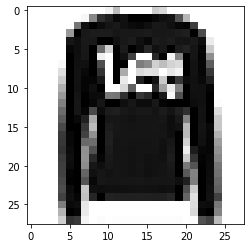

In [137]:
# using trained model with a single image
img = test_images[1]
print(img.shape)

img = (np.expand_dims(img, 0)) # keras is optimized to use batches, so we need to create one
print(img.shape)

plt.imshow(img[0], cmap='binary')

In [138]:
predict = prob_model.predict(img)
print(predict) # predictions for our image

[[2.0503450e-05 5.2383075e-14 9.9639183e-01 5.4594032e-08 8.4758620e-04
  4.2498877e-13 2.7400067e-03 4.1457576e-13 1.4568720e-10 1.5477771e-13]]


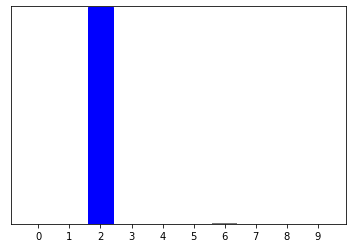

In [141]:
plot_value_array(1, predict[0], test_labels) # very well